In [14]:
#Import necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,confusion_matrix


#loading dataset and print whole data preview
df=pd.read_csv("sales.csv",encoding="latin1")
df

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

In [15]:
#print first 5 rows of data
df.head(5)

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [16]:
# The general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
# get number of rows and columns
df.shape

(200, 4)

In [18]:
#get column names
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [19]:
#scrutinizing rows and columns
print("rows-->",df.shape[0])
print("columns-->",df.shape[1])


rows--> 200
columns--> 4


In [20]:
#DATA CLEANING
#Checking for the NULL values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [21]:
#Removing insignificant columns
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
else:
    print("The 'Unnamed: 0' column does not exist in the DataFrame.")

df

The 'Unnamed: 0' column does not exist in the DataFrame.


TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

In [22]:
df.shape

(200, 4)

In [23]:
#Summary Statistics
df.describe()


TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [24]:
#'x' will contain all rows from 'df' and all columns except the last one.
x=df.iloc[:,0:-1]
x

TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

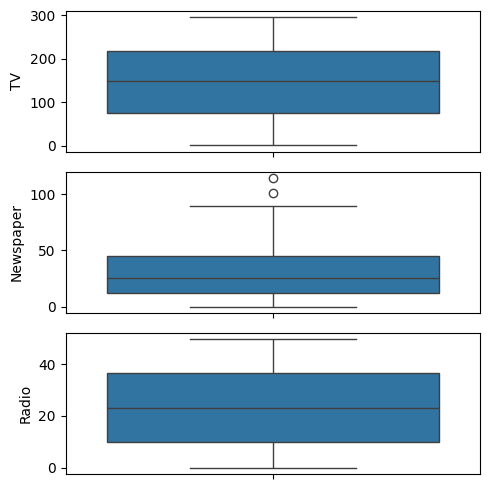

In [25]:
#Exploratory Data Analysis
#Box plot for the sales
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Newspaper'],ax=axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

C:\Users\priya\AppData\Local\Temp\ipykernel_17104\3262100579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

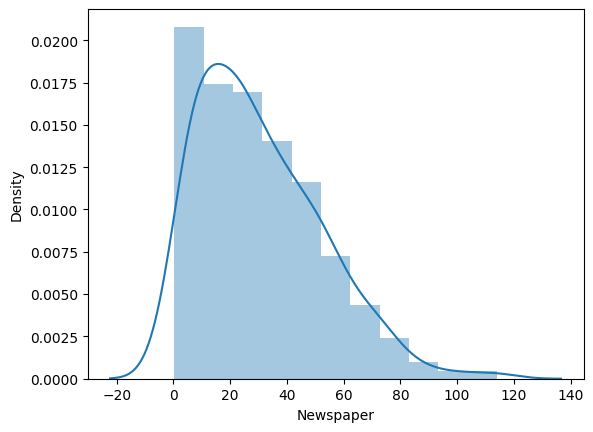

In [26]:
sns.distplot(df['Newspaper'])

In [27]:
#Sales data prediction
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [28]:
x.iloc[:,0]


0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [29]:
#displaying first 2 rows
df.head(2)

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4

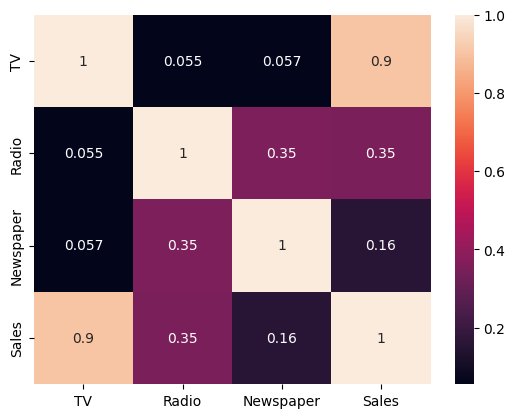

In [30]:
#identify the pairwise correlation between each column in the dataframe
df.corr()
sns.heatmap(df.corr(),annot=True)
plt.show()

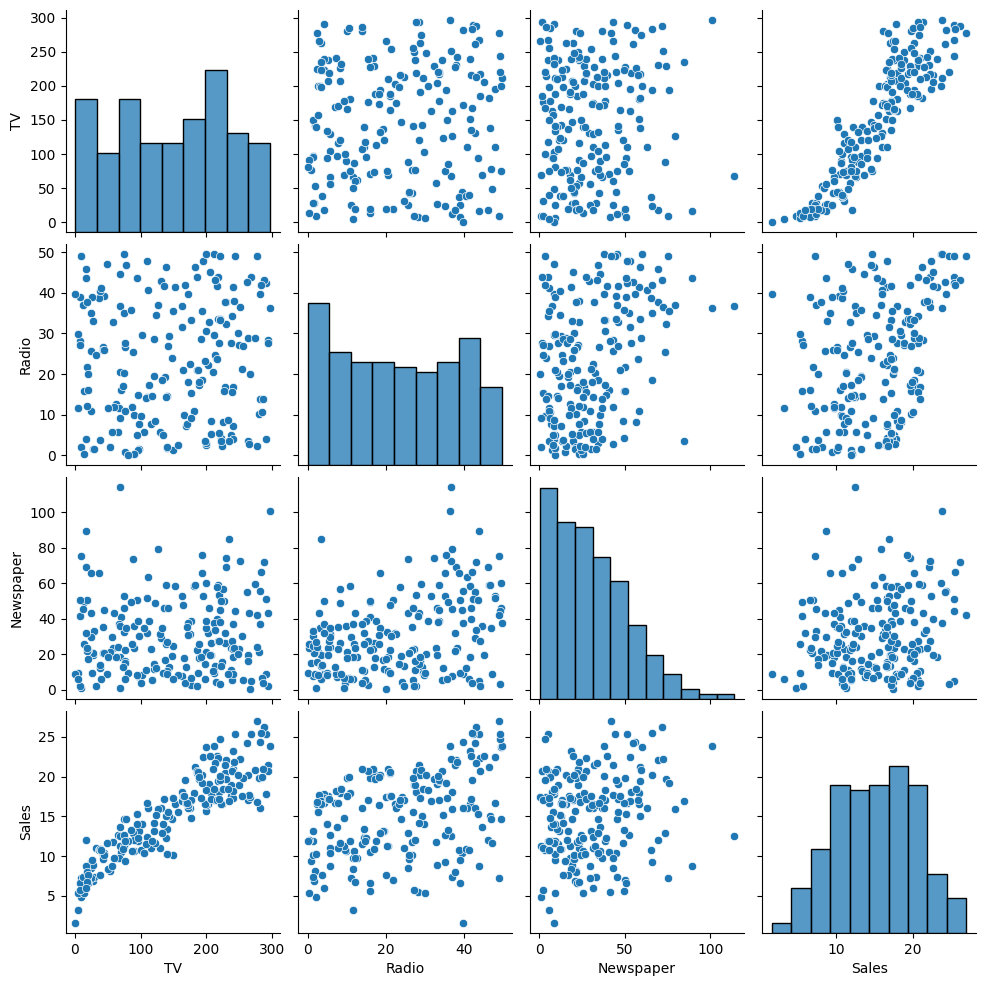

In [31]:
#Pairplot for visualizing relationship between variables
# integrating statistical graphs
sns.pairplot(data=df)
plt.show()

In [56]:
#Calculating Average Sales
average_sales = df['Sales'].mean()
print('Average Sales:',average_sales)

Average Sales: 15.130500000000001


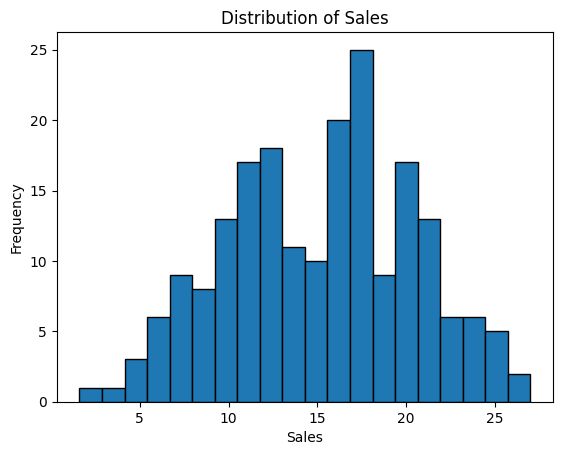

In [59]:
#Histogram sales
plt.hist(df['Sales'],bins=20,edgecolor='k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()



In [66]:
#Scatter plots for individual advertising channels
plt.scatter(df['TV'], df['Sales'], c='blue', label='TV')
plt.scatter(df['Radio'], df['Sales'], c='green', label='Radio')
plt.scatter(df['Newspaper'], df['Sales'], c='red', label='Newspaper')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.title('Advertising Expenditure vs. Sales')
plt.show()


In [32]:
#Spliting the data
#now we need to test hypothesis to estimate the performance
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=43)
xtrain


TV  Radio  Newspaper
116  139.2   14.3       25.6
138   43.0   25.9       20.5
155    4.1   11.6        5.7
82    75.3   20.3       32.5
160  172.5   18.1       30.7
..     ...    ...        ...
58   210.8   49.6       37.7
21   237.4    5.1       23.5
49    66.9   11.7       36.8
64   131.1   42.8       28.9
68   237.4   27.5       11.0

[160 rows x 3 columns]

In [47]:
xtest

TV  Radio  Newspaper
56     7     28         41
37    74     49         45
67   139     14         10
79   116      7         23
80    76     26         22
188  286     13          3
183  287     43         71
10    66      5         24
128  220     49          3
62   239     15         27
65    69      9          0
17   281     39         55
133  219     33         45
195   38      3         13
146  240      7          8
38    43     26         35
173  168      7         12
149   44     25         20
93   250     36         72
29    70     16         40
0    230     37         69
2     17     45         69
122  224      2         15
180  156      2          8
95   163     31         52
121   18     21         50
185  205     45         19
39   228     37         32
66    31     24          2
19   147     23         19
11   214     24          4
45   175     22         31
41   177     33         38
92   217     33         59
168  215     23         57
1     44     39         45
57   136     19         16
189   18     12         23
151  121      8         48
167  206      5         19

In [34]:
ytrain

116    12.2
138     9.6
155     3.2
82     11.3
160    16.4
       ... 
58     23.8
21     17.5
49      9.7
64     16.0
68     18.9
Name: Sales, Length: 160, dtype: float64

In [35]:
ytest

56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    20.9
183    26.2
10     12.6
128    24.7
62     20.7
65     11.3
17     24.4
133    19.6
195     7.6
146    18.2
38     10.1
173    16.7
149    10.1
93     22.2
29     10.5
0      22.1
2      12.0
122    16.6
180    15.5
95     16.9
121     7.0
185    22.6
39     21.5
66     11.0
19     14.6
11     17.4
45     16.1
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167    17.2
Name: Sales, dtype: float64

In [36]:
#Model Training
#Train a linear regression model on the data

xtrain=xtrain.astype(int)
ytrain=ytrain.astype(int)
xtest=xtest.astype(int)
ytest=ytest.astype(int)

In [37]:
sc=StandardScaler()
xtrain_scaled=sc.fit_transform(xtrain)
xtest_scaled=sc.fit_transform(xtest)
lg=LinearRegression()
lg.fit(xtrain_scaled,ytrain)


LinearRegression()

In [38]:
#method used for predictive analysis
y_pred=lg.predict(xtest_scaled)
y_pred

array([ 7.54922198, 13.62904208, 12.9850022 , 10.97169044, 10.9964622 ,
       20.8220441 , 24.58282614,  8.03044624, 21.40674385, 18.58588756,
        8.57331344, 23.73910449, 19.64580717,  6.24161024, 17.6487565 ,
        9.2505924 , 13.75549495,  9.13735757, 21.76838881,  9.57572847,
       20.78846495, 10.15587421, 16.22604388, 12.51187515, 16.399683  ,
        7.36710833, 20.18508673, 20.55222983,  8.25406066, 14.49172889,
       18.19142699, 15.93683486, 17.34252395, 19.5855985 , 18.31289409,
       10.84382551, 13.4215526 ,  6.23237328, 11.44502923, 15.61026452])

In [39]:
ytest

56      5
37     14
67     13
79     11
80     11
188    20
183    26
10     12
128    24
62     20
65     11
17     24
133    19
195     7
146    18
38     10
173    16
149    10
93     22
29     10
0      22
2      12
122    16
180    15
95     16
121     7
185    22
39     21
66     11
19     14
11     17
45     16
41     17
92     19
168    17
1      10
57     13
189     6
151    11
167    17
Name: Sales, dtype: int32

In [40]:
#visulization of y_pred and ytest
plt.scatter(ytest,y_pred,c='m')

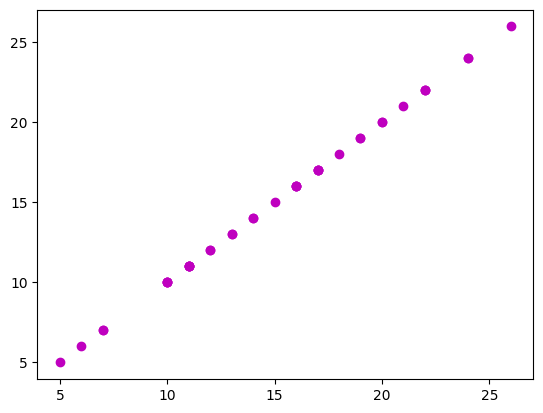

In [41]:
#visulization of ytest and ytest
plt.scatter(ytest,ytest,c='m')

In [42]:
plt.scatter(ytest,y_pred,c='r',label='Forecast',marker='x')
plt.scatter(ytest,ytest,c='g',label='True',marker='o')
plt.xlabel('True Value',c='b')
plt.ylabel('Forecast Value',c='b')
plt.title('True VS Forecasted',c='b')
plt.legend()
plt.show()

            

In [69]:
#Model evaluation
#testing the effectiveness of the regression model
mse=mean_squared_error(ytest,y_pred)
mae=mean_absolute_error(ytest,y_pred)
r2score=r2_score(ytest,y_pred)
print('mean squared error',mse)
print('mean absolute error',mae)
print('R-squared',r2score)
plt.scatter(ytest, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs. Predicted Sales')
plt.show()


mean squared error 1.9203755740738084
mean absolute error 1.025093075013364
R-squared 0.9297787522049983


In [ ]:
plt.scatter(xtest,ytest)
plt.plot(xtest,6.9955+0.0541*xtest,'y')
plt.show()
